In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 

In [2]:
# Read Images 
img = mpimg.imread('myface.jpg') 
img2 = mpimg.imread('mario.jpg')
img3 = mpimg.imread('tiger.jpg')

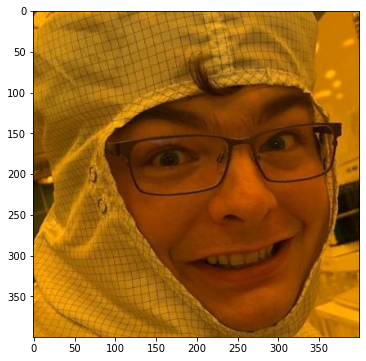

In [3]:
plt.figure(figsize=(6,6)) # Source: Me
plt.imshow(img);

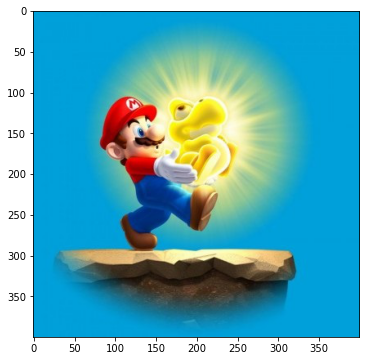

In [4]:
plt.figure(figsize=(6,6)) # Source: https://www.mariowiki.com/File:NSMBU_Mario_and_Glowing_Baby_Yoshi_Artwork.jpg
plt.imshow(img2);

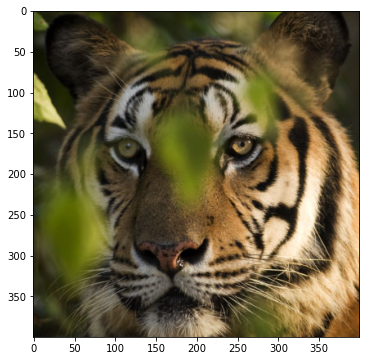

In [5]:
plt.figure(figsize=(6,6)) # Source: https://www.fauna-flora.org/species/sumatran-tiger
plt.imshow(img3);

In [6]:
img2.shape

(400, 400, 3)

In [7]:
import matplotlib as mpl
from matplotlib.colors import ListedColormap

def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

def cmap_gen(high, low="#000000",n=255):
    colors = []
    for i in range(0,n):
        colors.append(colorFader(low,high,i/n))
    return ListedColormap(colors)

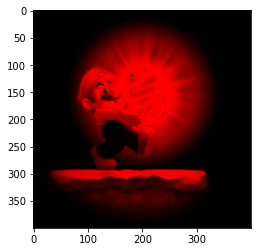

In [8]:
plt.imshow(img2[::,::,0], cmap = cmap_gen("#ff0000")); # Red

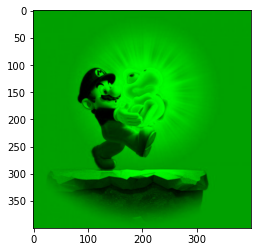

In [9]:
plt.imshow(img2[::,::,1], cmap = cmap_gen("#00ff00")); # Green

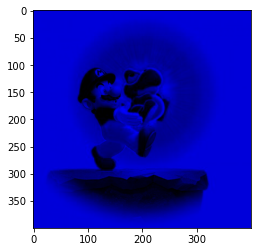

In [10]:
plt.imshow(img2[::,::,2], cmap = cmap_gen("#0000ff")); # Blue

In [11]:
img.shape

(400, 400, 3)

In [12]:
# Finding the 1D shape of our new array

dims = 1
for i in img.shape:
    dims *= i
dims

480000

In [13]:
img_reshaped = img.reshape(dims)
img_reshaped2 = img2.reshape(dims)
img_reshaped3 = img3.reshape(dims)
img_reshaped

array([120,  61,  17, ..., 213, 132,   0], dtype=uint8)

In [18]:
df = pd.DataFrame()
df = df.append(pd.DataFrame(img_reshaped).T)
df = df.append(pd.DataFrame(img_reshaped2).T)
df = df.append(pd.DataFrame(img_reshaped3).T)
df

,0,1,2,3,4,5,6,7,8,9,...,479990,479991,479992,479993,479994,479995,479996,479997,479998,479999
0,120,61,17,117,56,12,113,51,4,125,...,0,212,131,0,214,133,0,213,132,0
0,0,161,218,0,161,218,0,161,218,0,...,218,0,160,218,0,160,218,0,160,218
0,64,73,28,59,68,25,53,59,21,45,...,20,113,69,24,110,66,21,106,62,15
